In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(la):
    display(Math(la))

In [2]:
t=var("t")

assume(t, "real")

C=var("C")
x=function('x')(t)

In [3]:
m, k, mu, a, omega, omega_0, r, omega_0_r, A = var("m, k, mu, a, omega, omega_0, r, omega_0_r, A")

assume(omega, "real")
assume(omega > 0)

assume(omega_0, "real")
assume(omega_0 > 0)

assume(a, "real")
assume(a > 0)

assume(A, "real")
assume(A > 0)

assume(mu, "real")
assume(mu > 0)

assume(r, "real")
assume(r > 0)

assume(k, "real")
assume(k > 0)

assume(m, "real")
assume(m > 0)

In [4]:
# weak loss
assume(r < omega_0)

In [5]:
eq_1 = m * diff(x,t,2) == - k*x - mu*diff(x,t) +  a * cos(omega * t)

In [6]:
# eq_1 = m * diff(x,t,2) == - k*x - mu*diff(x,t) +  a * exp(I*omega * t)

In [7]:
# k/m = omega_0^2
# mu/m = 2 * r
# a / m = A
eq = (eq_1 / m).subs(k == omega_0^2 * m).subs(mu == 2 * r * m).subs(a == A * m).expand()

In [8]:
disp(eq)

<IPython.core.display.Math object>

In [9]:
common_sol = desolve(eq, x, ivar=t, contrib_ode = True,  algorithm="fricas")

In [10]:
disp(common_sol)

<IPython.core.display.Math object>

In [11]:
sol = common_sol.subs(var("_C0") == 0, var("_C1") == 0)

In [12]:
disp(sol)

<IPython.core.display.Math object>

In [13]:
v_t = diff(sol,t)
disp(v_t)

<IPython.core.display.Math object>

$sol = B\,sin(\omega\,t) - C\,cos(\omega\,t)$

In [14]:
B = sol.coefficient(sin(omega*t))
disp(B)

<IPython.core.display.Math object>

In [15]:
C = - sol.coefficient(cos(omega*t))
disp(C)

<IPython.core.display.Math object>

$sol = B\,sin(\omega\,t) - C\,cos(\omega\,t)$

$sin (x - y) = sin(x)\,cos (y) - cos(x)\,sin(y)$

$K \cdot sin (x - y) =  K \cdot sin(x)\,cos (y) - K \cdot cos(x)\,sin(y)$

$K \cdot sin (x - y) =  K \cdot sin(x)\,b - K \cdot cos(x)\,c$

$b = cos(y) = cos(\varphi)$

$c = sin(y) = sin(\varphi)$

$sol = K \cdot sin (\omega\,t - \varphi) =  K \cdot sin(\omega\,t)\,b - K \cdot cos(\omega\,t)\,c = B\,sin(\omega\,t) - C\,cos(\omega\,t)$

$K \,b = K \,cos(\varphi) = B$

$K \,c = K \,sin(\varphi) = C$


$K^2 \,cos^2(\varphi) = B^2$

$K^2 \,sin^2(\varphi) = C^2$

$K^2 \,\left(cos^2(\varphi) + sin^2(\varphi)\right) = B^2+C^2$

$K^2 = B^2+C^2$

$cos(\varphi) = \frac{B}{\sqrt{B^2+C^2}}$

In [16]:
K = sqrt(B^2 + C^2).full_simplify()
disp(K)

<IPython.core.display.Math object>

In [17]:
cos_phi = (B / K).full_simplify()
disp(cos_phi)

<IPython.core.display.Math object>

In [18]:
sol_2 = K * sin(omega * t - arccos(cos_phi))
disp(sol_2)

<IPython.core.display.Math object>

In [19]:
#sol = desolve(eq, x, ivar=t, contrib_ode = True,  algorithm="fricas", ics=[0,0])

In [20]:
#disp(sol)

In [21]:
# k/m = omega_0^2
# mu/m = 2 * r
# a / m = A
# omega_0_r^2 = omega_0^2 - r^2
test_values_0 = [
    m == 0.05,
    k == 0.1,
    a == 0.05,
    mu == 0.075,
]

In [22]:
test_values = [
    A == (a/m).subs(test_values_0),
    omega_0 == sqrt(k/m).subs(test_values_0),
    omega_0_r == sqrt((k/m)-(mu/m/2)^2).subs(test_values_0),
    r == (mu/m/2).subs(test_values_0),
]
test_values

[A == 1.00000000000000,
 omega_0 == 1.41421356237310,
 omega_0_r == 1.19895788082818,
 r == 0.750000000000000]

In [23]:
sol_test = sol.subs(test_values)
disp(sol_test)

<IPython.core.display.Math object>

In [24]:
sol_test.real()

-((1.00000000000000*omega^2 - 2.00000000000000)*cos(omega*t) - 1.50000000000000*omega*sin(omega*t))/(omega^4 - 1.75000000000000*omega^2 + 4.00000000000000)

In [25]:
exec(preparse("sol_test_fun = lambda t, omega : " + str(sol.subs(test_values).real())))

In [26]:
import numpy as np
t_range = [i for i in np.arange(0, 20, 0.01)]
omega_range = [i for i in np.arange(0, 5, 1)]

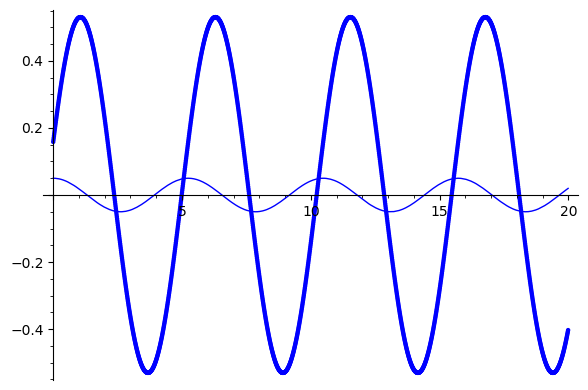

In [27]:
Omega = omega_0_r.subs(test_values)
p  = list_plot([(t, sol_test_fun(t = t, omega = Omega)) for t in t_range])
p += plot((a * cos(omega * t)).subs(test_values_0).subs(omega = Omega),
          t, t_range[0], t_range[len(t_range)-1])
p.show()

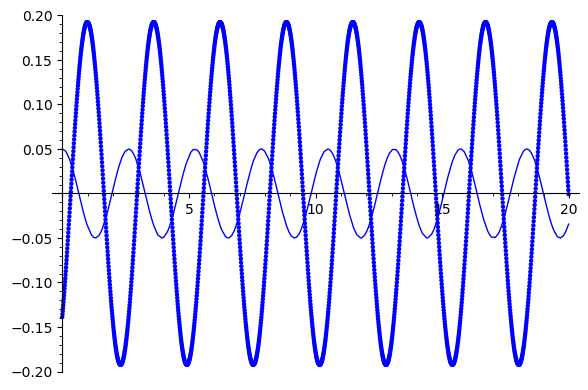

In [28]:
Omega = 2*omega_0_r.subs(test_values)
p  = list_plot([(t, sol_test_fun(t = t, omega = Omega)) for t in t_range])
p += plot((a * cos(omega * t)).subs(test_values_0).subs(omega = Omega),
          t, t_range[0], t_range[len(t_range)-1])
p.show()

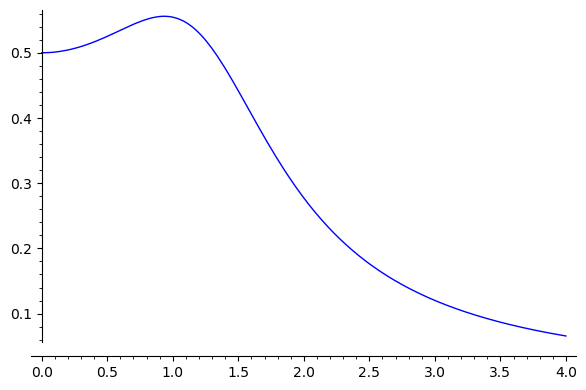

In [29]:
plot(K.subs(test_values), omega, 0, omega_range[len(omega_range)-1])

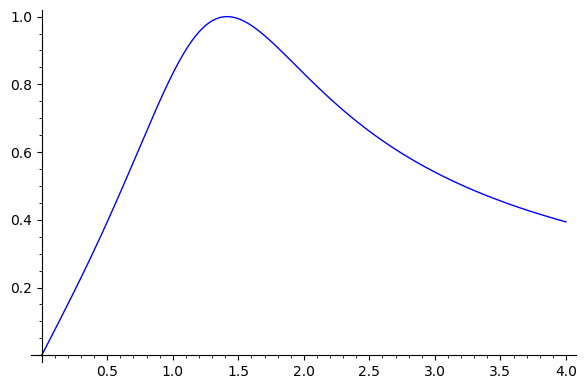

In [30]:
plot(cos_phi.subs(test_values), omega, 0, omega_range[len(omega_range)-1])

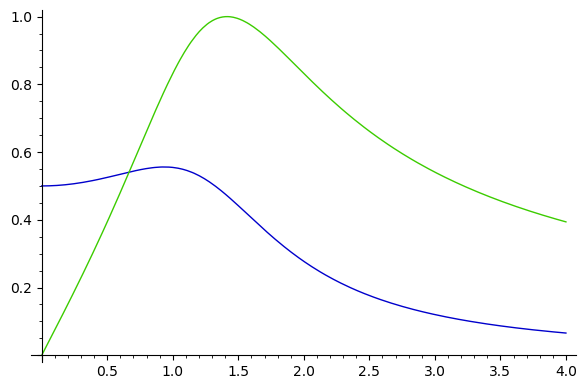

In [31]:
plot([K.subs(test_values), cos_phi.subs(test_values)], omega, 0, omega_range[len(omega_range)-1])